# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Степанов Михаил Николаевич БВТ2003
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла | Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Создание графа

In [247]:
from queue import PriorityQueue
import networkx as nx
from timeit import default_timer as timer
import math

In [219]:
class Graph:
    def __init__(self, matrix):
        self.matrix = matrix
        self.graph = [set() for _ in range(len(matrix))]
        self.visual = nx.Graph()
        for i in range(len(matrix)):
            self.visual.add_node(i)
            for j in range(len(matrix[i])):
                if matrix[i][j] != math.inf:
                    self.__set_edge((i,j,matrix[i][j]))


    def __set_edge(self, edge):
        self.graph[edge[0]].add((edge[1], edge[2]))
        self.visual.add_edge(edge[0], edge[1])
    
    def draw_path(self, path):
        nx.draw_circular(
            self.visual,
            node_color='red',
            node_size=1000,
            with_labels=True,
            edge_color='blue',
            width = 3
        )
        for i in range(len(path)-1):
            self.visual.remove_edge(i,i+1)
            self.visual.add_edge(i, i+1, color = 'red', weight=100)

    def get_graph(self):
        return self.graph.copy()
    
    def get_matrix_without_edge(self, a, b):
        matrix = self.get_matrix()
        matrix[a][b] = math.inf
        return matrix

    def get_vertex_count(self):
        return len(self.graph)

    def get_neighbors(self, vertex):
        neighbors = list()
        if vertex < len(self.matrix):
            neighbors = self.graph[vertex]
        return neighbors

    def get_distance(self, a,b):
        if a in range(self.get_vertex_count()) and b in range(self.get_vertex_count()):
            for neighbor in self.get_neighbors(a):
                if neighbor[0] == b:
                    return neighbor[1]
        return None

    def get_matrix(self):
        return self.__copy_matrix()

    def __copy_matrix(self):
        result = list()
        for row in self.matrix:
            result.append(row.copy())
        return result

In [246]:
Q = math.inf

nines_matrix = [ 
    [0, 2, 6, 8, Q, Q, 3, Q, Q],
    [2, 0, 9, 3, Q, 4, 9, Q, Q],
    [6, 9, 0, 7, Q, Q, Q, Q, Q],
    [8, 3, 7, 0, 5, 5, Q, Q, Q],
    [Q, Q, Q, 5, 0, Q, 8, 9, Q],
    [Q, 4, Q, 5, Q, 0, Q, 6, 4],
    [3, 9, Q, Q, 8, Q, 0, Q, Q],
    [Q, Q, Q, Q, 9, 6, Q, 0, 1],
    [Q, Q, Q, Q, Q, 4, Q, 1, 0]
]

sevens_matrix = [
    [0, 4, Q, Q, Q, Q, 5],
    [4, 0, 7, 1, Q, 2, Q],
    [Q, 7, 0, Q, 3, 5, 1],
    [Q, 1, Q, 0, Q, Q, 4],
    [Q, Q, 3, Q, 0, Q, Q],
    [Q, 2, 5, Q, Q, 0, 2],
    [5, Q, 1, 4, Q, 2, 0]
]

fours_matrix = [
    [0, 4, 5, Q],
    [Q, 0, 2, 1],
    [3, 1, 0, 2],
    [8, Q, 7, 0]
]

test_matrixes = [fours_matrix, sevens_matrix, nines_matrix]

johnson_mtx = [
    [0, -2, 7, 5],
    [Q,  0, 8, 6],
    [Q, 3, 0, -4],
    [-1, Q, Q, 0]
]

Алгоритм Флойда-Уоршелла

In [242]:
class Floyd_Warshell:
    def __init__(self, graph: Graph):
        self.size = graph.get_vertex_count()
        self.matrix = graph.get_matrix()
        self.__get_distances()

    def __get_distances(self):
        for i in range(self.size):
            for j in range(self.size):
                if i == j:
                    self.matrix[i][j]=0
                    continue
                self.matrix[i][j] = self.__min_distance(i,j,self.size-1)
        
    def __min_distance(self, a, b, k):
        if k == -1:
            return self.matrix[a][b]
        else:
            return min(self.__min_distance(a,b,k-1), self.__min_distance(a,k,k-1) + self.__min_distance(k,b,k-1))

    def get_distance(self,start,final):
        #print(self.matrix)
        if start in range(self.size) and final in range(self.size):
            return self.matrix[start][final]
        return None

In [248]:
for matrix in test_matrixes:
    start = timer()
    Floyd_Warshell(Graph(matrix)).get_distance(0,3)
    end = timer()
    print(f"Флойд-Уоршел {len(matrix)} за {end-start}")

Флойд-Уоршел 4 за 0.0003412000005482696
Флойд-Уоршел 7 за 0.022129699995275587
Флойд-Уоршел 9 за 0.33036949999950593


Дейкстра

In [244]:
class Dijkstra:
    def __init__ (self, graph : Graph, start = 0):
        self.graph = graph
        self.paths = self.get_paths(start)

    def get_paths(self, start):
        came_from = {}
        current_cost = {}
        variants = PriorityQueue()

        variants.put((start, 0))        
        came_from[start] = None
        current_cost[start] = 0
        
        while not variants.empty():
            current = variants.get()

            for next_neighbor in self.graph.get_neighbors(current[0]):
                new_cost = current_cost[current[0]] + next_neighbor[1]
                if next_neighbor[0] not in current_cost or new_cost < current_cost[next_neighbor[0]]:
                    current_cost[next_neighbor[0]] = new_cost
                    priority = new_cost
                    variants.put((next_neighbor[0], priority))
                    came_from[next_neighbor[0]] = current[0]

        return came_from

    def get_path(self, start, final):
        if start in range(self.graph.get_vertex_count()) and final in range(self.graph.get_vertex_count()):
            current = final
            result = list()
            distance = 0

            depth = len(self.paths)
            while depth > 0:
                depth-=1

                result.append(current)

                if current == start:
                    return result[::-1], distance
                
                distance += self.graph.get_distance(self.paths[current], current)
                current = self.paths[current]
            
        return None, None
    
    def get_paths_distances(self, start):
        size = self.graph.get_vertex_count()
        paths = list()
        distances = list()
        for final in range(size):
            #if final != start:
            path, distance = self.get_path(start, final)
            paths.append(path.copy())
            distances.append(distance)
        return paths, distances


[0, 1, 3] 5


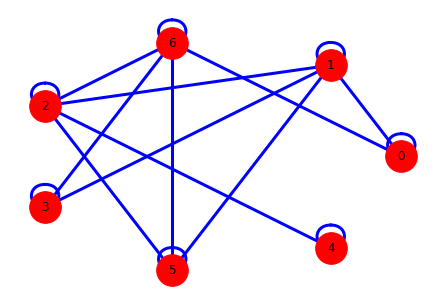

In [245]:
graph = Graph(sevens_matrix)

path, distance = Dijkstra(graph).get_path(0,3)
print(path, distance)

graph.draw_path(path)

Беллман-Форд

In [92]:
def bellman_ford(matrix, start):
    graph = Graph(matrix)
    graph_edges = graph.get_graph()

    dist = [math.inf] *graph.get_vertex_count()
    dist[start] = 0

    for i in range(graph.get_vertex_count()-1):
        for j in range(graph.get_vertex_count()):
            for edge in graph_edges[j]:
                if dist[j] != math.inf and dist[j]+edge[1] < dist[edge[0]]:
                    dist[edge[0]] = dist[j]+edge[1]
    
    for j in range(graph.get_vertex_count()):
        for edge in graph_edges[j]:
                if dist[j] != math.inf and dist[j]+edge[1] < dist[edge[0]]:
                    print("Граф не может найти точную кратчайшую дистанцию")
                    return False
    
    return dist   

In [93]:
def get_bellman_ford_distance(graph, start, finish):
    return bellman_ford(graph.get_matrix(),start)[finish]

In [252]:
print(get_bellman_ford_distance(Graph(sevens_matrix),0,3))

5


Джонсон

In [95]:
class Johnson:
    def __init__(self, graph: Graph):
        self.graph = graph
        self.size = graph.get_vertex_count()

        self.paths = [[] for _ in range(self.size)]
        self.distances = [[] for _ in range(self.size)]

        self.paths, self.distances = self.get_paths(self.graph)
    
    def get_paths(self, graph: Graph):
        extended_matrix = self.__create_extended_matrix(graph)
        extended_size = len(extended_matrix)

        paths = [[] for _ in range(self.size)]
        distances = [[] for _ in range(self.size)]

        h = bellman_ford(extended_matrix, 0)

        if not h:
            return None, None

        for i in range(extended_size):
            for j in range(extended_size):
                extended_matrix[i][j]+=h[i]-h[j]
        

        dijkstra_graph = Graph(self.__cut_extended_matrix(extended_matrix))
        for i in range(self.size):
            paths[i], distances[i] = Dijkstra(dijkstra_graph,i).get_paths_distances(i)

        for i in range(len(self.distances)):
            for j in range(len(self.distances[i])):
                distances[i][j]+=h[j]-h[i]

        return paths, distances

    def get_path(self, start, finish):
        if start in range(self.size) and finish in range(self.size):
            return self.paths[start][finish], self.distances[start][finish]
        return None

    def __create_extended_matrix(self, graph: Graph):
        matrix = graph.get_matrix()
        matrix = [[0 for i in range(len(matrix))],*matrix]

        matrix[0].insert(0,0)
        for i in range(1,len(matrix)):
            matrix[i].insert(0,math.inf)

        return matrix
    

    def __cut_extended_matrix(self, matrix):
        result = list()

        for i in range(1,len(matrix)):
            result.append(matrix[i][1:len(matrix)].copy())

        return result

In [266]:
print(Johnson(Graph(johnson_mtx)).get_path(0,3))

([0, 1, 2, 3], 1)


Левит

In [98]:
def levith(graph: Graph, start, finish):
    size = graph.get_vertex_count()
    
    if start in range(size) and finish in range(size):
        viewed = set()
        waiting = set()
        que_express = list()
        que_normal = list()

        came_from = {}
        came_from[start] = None

        shortest_distance = [math.inf] * size
        shortest_distance[start] = 0

        edges = graph.get_graph()

        que_normal.append(start)
        for i in range(size):
            if i != start:
                waiting.add(i)
        
        while len(que_express)>0 or len(que_normal)>0:
            current = que_express.pop() if len(que_express)>0 else que_normal.pop()
            for edge in edges[current]:
                if edge[0] in waiting:
                    que_normal.append(edge[0])
                    waiting.remove(edge[0])
                    if shortest_distance[edge[0]]>shortest_distance[current]+edge[1]:
                        shortest_distance[edge[0]] = shortest_distance[current]+edge[1]
                        came_from[edge[0]]=current
                elif edge[0] in que_normal:
                    if shortest_distance[edge[0]]>shortest_distance[current]+edge[1]:
                       shortest_distance[edge[0]] = shortest_distance[current]+edge[1]
                       came_from[edge[0]]=current
                elif edge[0] in viewed and shortest_distance[edge[0]]>shortest_distance[current]+edge[1]:
                    shortest_distance[edge[0]] = shortest_distance[current]+edge[1]
                    came_from[edge[0]]=current
            viewed.add(current)
        
        return get_path(came_from, start, finish), shortest_distance[finish]

In [99]:
def get_path(came_from, start, final):
        current = final
        result = list()
        depth = len(came_from)

        while depth > 0:
            depth-=1
            result.append(current)

            if current == start:
                return result[::-1]

            current = came_from[current]

        return None

In [258]:
print(levith(Graph(sevens_matrix),0,3))

([0, 1, 3], 5)


Йен

In [101]:
def yen(graph: Graph, start, finish):
    size = graph.get_vertex_count()
    distances = list()
    paths = list()
    if start in range(size) and finish in range(size):
        path, distance = Dijkstra(graph).get_path(start, finish)
        first_path = path.copy()

        if path is not None:
            paths.append(path)
            distances.append(distance)

            for i in range(len(first_path)-1):
                path, distance = Dijkstra(Graph(graph.get_matrix_without_edge(first_path[i], first_path[i+1]))).get_path(start, finish)
                if path is not None:
                    paths.append(path)
                    distances.append(distance)
            
            minimal = 0
            for i in range(len(distances)):
                if distances[i] < distances[minimal]:
                    minimal = i

            return paths[minimal], distances[minimal]


    return None

In [257]:
print(yen(Graph(sevens_matrix),0,3))

([0, 1, 3], 5)


### Вывод

In [249]:
for matrix in test_matrixes:
    start = timer()
    Floyd_Warshell(Graph(matrix)).get_distance(0,3)
    end = timer()
    print(f"Флойд-Уоршел {len(matrix)} за {end-start}")

Флойд-Уоршел 4 за 0.0002727999963099137
Флойд-Уоршел 7 за 0.022584599995752797
Флойд-Уоршел 9 за 0.3422599999976228


In [251]:
for matrix in test_matrixes:
    start = timer()
    Dijkstra(Graph(matrix)).get_path(0,3)
    end = timer()
    print(f"Дейкстра {len(matrix)} за {end-start}")

Дейкстра 4 за 0.00010170000314246863
Дейкстра 7 за 0.0001097999993362464
Дейкстра 9 за 0.000134599999000784


In [254]:
for matrix in test_matrixes:
    start = timer()
    get_bellman_ford_distance(Graph(sevens_matrix),0,3)
    end = timer()
    print(f"Беллман-Форд {len(matrix)} за {end-start}")


Беллман-Форд 4 за 0.00016029999824240804
Беллман-Форд 7 за 0.00014059999375604093
Беллман-Форд 9 за 0.00011180000001331791


In [256]:
for matrix in test_matrixes:
    start = timer()
    Johnson(Graph(sevens_matrix)).get_path(0,6)
    end = timer()
    print(f"Джонсон {len(matrix)} за {end-start}")


Джонсон 4 за 0.0014482999977190048
Джонсон 7 за 0.000847700001031626
Джонсон 9 за 0.0007390000027953647


In [259]:
for matrix in test_matrixes:
    start = timer()
    levith(Graph(sevens_matrix),0,3)
    end = timer()
    print(f"Левит {len(matrix)} за {end-start}")

Левит 4 за 7.609999738633633e-05
Левит 7 за 5.860000237589702e-05
Левит 9 за 5.5999997130129486e-05


In [260]:
for matrix in test_matrixes:
    start = timer()
    yen(Graph(sevens_matrix),0,3)
    end = timer()
    print(f"Йен {len(matrix)} за {end-start}")

Йен 4 за 0.0005124999952386133
Йен 7 за 0.0003404000017326325
Йен 9 за 0.00035900000511901453
